<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td align="center"; style="background-color:transparent;"><a href = "https://joliot.cea.fr/drf/joliot/recherche/neurospin"><img src="https://baobablab.github.io/bhb/images/collaborators/cea.jpg" width="35%"></td>
    <td align="center"; style="background-color:transparent; width: 50%;"><a href = "https://dataia.eu/"><img src="https://github.com/ramp-kits/brain_anatomy_schizophrenia/raw/main/DATAIA-h.png" width="80%"></a></td>
  </tr>
</table> 
</div>

<center><h1>Predict schizophrenia using brain anatomy</h1></center>


<center><i>Edouard Duchesnay, Antoine Grigis, Benoît Dufumier (Université Paris-Saclay, CEA, NeuroSpin), François Caud, Alexandre Gramfort (Université Paris-Saclay, DATAIA) </i></center>

Predict schizophrenia from brain grey matter (GM). schizophrenia is associated with diffuse and complex pattern of brain atrophy. We will try to learn a predictor of the clinical status (patient with schizophrenia vs. healthy control) using GM measurements on the brain participants.


## Dataset

There are 410 samples in the training set and 103 samples in the test set.


### Input data

Voxel-based_morphometry [VBM](https://en.wikipedia.org/wiki/Voxel-based_morphometry)
using [cat12](http://www.neuro.uni-jena.de/cat/) software which provides:

- Regions Of Interest (`rois`) of Grey Matter (GM) scaled for the Total
  Intracranial Volume (TIV): `[train|test]_rois.csv` 284 features.

- VBM GM 3D maps or images (`vbm3d`) of [voxels](https://en.wikipedia.org/wiki/Voxel) in the
  [MNI](https://en.wikipedia.org/wiki/Talairach_coordinates) space:
  `[train|test]_vbm.npz` contains 3D images of shapes (121, 145, 121).
  This npz contains the 3D mask and the affine transformation to MNI
  referential. Masking the brain provide *flat* 331 695 input features (voxels)
  for each participant.

By default `problem.get_[train|test]_data()` return the concatenation of 284 ROIs of
Grey Matter (GM) features with 331 695 features (voxels) within a brain mask.
Those two blocks are higly redundant.
To select only on ROIs (`rois`) features do:

```
X[:, :284]
```

To select only on (`vbm`) (voxel with the brain) features do:

```
X[:, 284:]
```

### Target

The target can be found in `[test|train]_participants.csv` files, selecting the
`age` column for regression problem.

## Evaluation metrics

[sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

The main Evaluation metrics is the Root-mean-square deviation
[RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation). We will also
look at the R-squared
[R2](https://en.wikipedia.org/wiki/Coefficient_of_determination).


## Links


- [RAMP-workflow’s documentation](https://paris-saclay-cds.github.io/ramp-workflow/)
- [RAMP-workflow’s github](https://github.com/paris-saclay-cds/ramp-workflow)
- [RAMP Kits](https://github.com/ramp-kits)

## Installation

This starting kit requires Python and the following dependencies:

* `numpy`
* `scipy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `jupyter`
* `ramp-workflow`

Therefore, we advise you to install [Anaconda
distribution](https://www.anaconda.com/download/) which include almost all
dependencies.

Only `nilearn` and `ramp-workflow` are not included by default in the Anaconda
distribution. They will be installed from the execution of the notebook.

To run a submission and the notebook you will need the dependencies listed in requirements.txt.
You can install the dependencies with the following command-line:

```
pip install -U -r requirements.txt
```

If you are using conda, we provide an environment.yml file for similar usage.

```
conda env create -f environment.yml
```

Then, you can activate the environment using:

```
conda activate brain-anatomy-schizophrenia
```

And desactivate using

```
conda deactivate
```

## Getting started

1. Download the data locally:

```
python download_data.py
```

2. Execute the jupyter notebook, from the root directory using:

```
jupyter notebook brain_anatomy_schizophrenia_starting_kit.ipynb
```

Tune your model using the starting_kit

3. Submission (Run locally)

The submissions need to be located in the `submissions` folder.
For instance for `starting_kit`, it should be located in
`submissions/starting_kit`.

Copy everything required to build your estimator in a submission file:
`submissions/starting_kit/estimator.py`.
This file must contain a function `get_estimator()`.

Run locally:

```
ramp-test --submission starting_kit
```

4. Submission on RAMP:

[Using RAMP starting-kits](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html)

## Descriptive statistics

         age                                                    
       count       mean        std   min   25%   50%   75%   max
set                                                             
test   103.0  33.466019  12.809935  14.0  23.5  31.0  41.0  66.0
train  410.0  33.068293  12.562225  15.0  22.0  29.0  43.0  65.0
           age
set   sex     
test  0.0   65
      1.0   38
train 0.0  257
      1.0  153


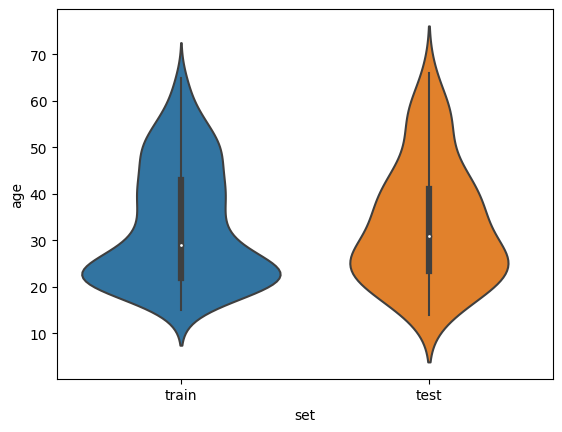

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

participants_train = pd.read_csv(os.path.join("data", "train_participants.csv" ))
participants_train["set"] = 'train'
participants_test = pd.read_csv(os.path.join("data", "test_participants.csv" ))
participants_test["set"] = 'test'
participants = pd.concat([participants_train, participants_test])

sns.violinplot(x="set", y="age", data=participants)
print(participants[["age", "set"]].groupby("set").describe())
print(participants[["set", "sex", "age"]].groupby(["set", "sex"]).count())

In [2]:
###  ***********************
"""
import statsmodels.api as sm
import statsmodels.formula.api as smfrmla
import scipy.stats
import seaborn as sns

print(smfrmla.ols("age ~ set", data=participants).fit().summary())
print("Significant difference in age between patients (test set) and controls (training set")

"""

'\nimport statsmodels.api as sm\nimport statsmodels.formula.api as smfrmla\nimport scipy.stats\nimport seaborn as sns\n\nprint(smfrmla.ols("age ~ set", data=participants).fit().summary())\nprint("Significant difference in age between patients (test set) and controls (training set")\n\n'

## Unsupervized analysis: Explore main sources of variabilities

Load ROIs data, `train_rois.csv` provides:

- Global volumes of "tissues": CerrebroSpinal Fluid (`CSF_Vol`), Grey (`GM_Vol`) and White Matter (`WM_Vol`) volume of participants.
- ROIs are starting at column `l3thVen_GM_Vol`. Note that `rois_train.loc[:, 'l3thVen_GM_Vol':]` matches `problem.get_train_data()[:, :284]`.

In [3]:
rois_train = pd.read_csv(os.path.join("data", "train_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois_test = pd.read_csv(os.path.join("data", "test_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois = pd.concat([rois_train, rois_test])

### PCA on ROIs: explore global effect of age

                 sum_sq     df          F        PR(>F)
diagnosis   2606.207928    1.0  29.245287  9.808873e-08
Residual   45538.013350  511.0        NaN           NaN
                 sum_sq     df          F    PR(>F)
diagnosis    791.094363    1.0  10.876419  0.001042
Residual   37167.493121  511.0        NaN       NaN


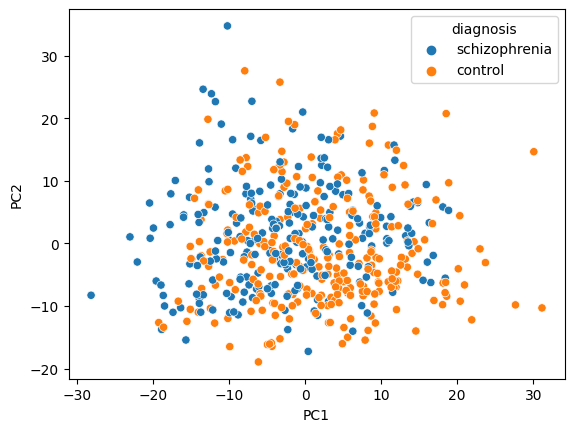

In [13]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

PCs = PCA(n_components=2).fit_transform(rois)
participants['PC1'], participants['PC2']  = PCs[:, 0], PCs[:, 1]

sns.scatterplot (x="PC1", y="PC2", hue="diagnosis",  data=participants)
oneway = smf.ols('PC1 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))
oneway = smf.ols('PC2 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))

Diagnosis is associated with two first components, we expect to be abble to predict the diagnosis

In [5]:
participants.shape  #(513, 14)
participants.groupby(['diagnosis']).size()

diagnosis
control          277
schizophrenia    236
dtype: int64

In [6]:
###  ***********************

import statsmodels.api as sm
import statsmodels.formula.api as smfrmla
import scipy.stats
import seaborn as sns

print(smfrmla.ols("age ~ set", data=participants).fit().summary())
print("No Significant difference in age between patients (test set) and controls (training set")

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08187
Date:                Fri, 30 Dec 2022   Prob (F-statistic):              0.775
Time:                        12:51:51   Log-Likelihood:                -2027.2
No. Observations:                 513   AIC:                             4058.
Df Residuals:                     511   BIC:                             4067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       33.4660      1.243     26.930   

C:\Users\ababi\AppData\Local\Temp\ipykernel_16804\3526566601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = participants.corr()


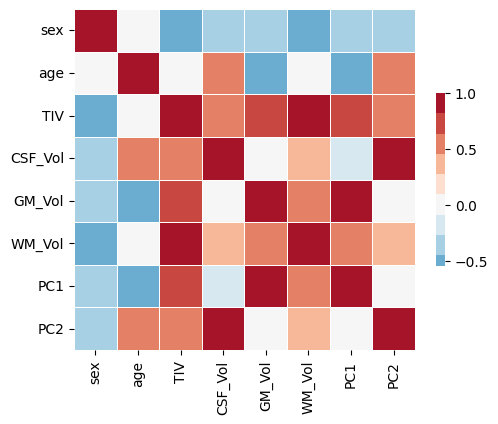

In [7]:
# convert correlation to distances
corr = participants.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5.5, 4.5))
cmap = sns.color_palette("RdBu_r", 11)

_ = sns.heatmap(corr, mask=None, cmap=cmap, vmax=1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

c:\Users\ababi\anaconda3\anacon\envs\brain-anatomy-schizophrenia\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol', 'PC1', 'PC2'], ['age'], ['sex']]


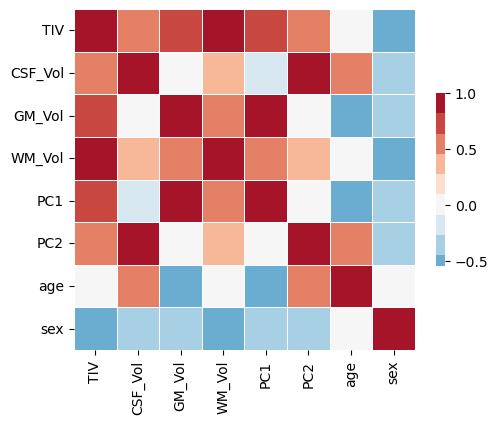

In [7]:
#Re-order correlation matrix using AgglomerativeClustering
d = 2 * (1 - np.abs(corr))
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='single', affinity="precomputed").fit(d)
lab=0
clusters = [list(corr.columns[clustering.labels_==lab]) for lab in set(clustering.labels_)]
print(clusters)
reordered = np.concatenate(clusters)
R = corr.loc[reordered, reordered]
f, ax = plt.subplots(figsize=(5.5, 4.5))
# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(R, mask=None, cmap=cmap, vmax=1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Machine learning


Import and read data

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import BaseEstimator
import sklearn.preprocessing as preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
import problem

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

Load concatenated data: 284 features from ROIs and 331,695 features from VBM.

In [5]:
X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

assert X_train.shape[1] == 284 + 331695

In [6]:
X_train.shape[1]

331979

## Traitement des outliers

In [7]:
import os

import pandas as pd
import numpy as np
import rampwf as rw
import os.path

_target_column_name = 'diagnosis'
_prediction_label_names = ['control', 'schizophrenia']

def _read_data(path, dataset, datatype=['rois', 'vbm']):

    # Read target
    participants = pd.read_csv(os.path.join(
        path, 'data', "%s_participants.csv" % dataset))
    y_arr = pd.DataFrame(participants[_target_column_name])

    x_arr_l = pd.DataFrame()
    # Read ROIs
    if 'rois' in datatype:
        rois = pd.read_csv(os.path.join(
            path, 'data', "%s_rois.csv" % dataset))
        x_rois_arr = pd.DataFrame(rois.loc[:, 'l3thVen_GM_Vol':])
        assert x_rois_arr.shape[1] == 284
###### ---------------
    return x_rois_arr, y_arr


def get_train_data(path='.', datatype=['rois', 'vbm']):
    dataset = 'train'
    return _read_data(path, dataset, datatype)


def get_test_data(path='.', datatype=['rois', 'vbm']):
    dataset = 'test'
    return _read_data(path, dataset, datatype)

df_x_train, df_y_train = get_train_data()
df_x_test, df_y_test = get_test_data()
# x_arr, y_arr = get_test_data()

In [8]:
df_x_test.shape

(103, 284)

In [9]:
df_y_train.head(3)  #il faut le label_encoder

diagnosis
0  schizophrenia
1        control
2        control

In [10]:
def iqr(df):
    for col in df.columns:
        if df[col].dtype != object:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            S = 1.5*IQR
            LB = Q1 - S
            UB = Q3 + S
            df.loc[df[col] > UB,col] = UB
            df.loc[df[col] < LB,col] = LB
        else:
            break
    return df

In [11]:
df_X_train = iqr(df_x_train)

In [12]:
df_X_train.shape

(410, 284)

In [17]:
df_X_train[df_X_train.isna().any(axis=1)]  #no nan values in data set

Empty DataFrame
Columns: [l3thVen_GM_Vol, r3thVen_GM_Vol, l4thVen_GM_Vol, r4thVen_GM_Vol, lAcc_GM_Vol, rAcc_GM_Vol, lAmy_GM_Vol, rAmy_GM_Vol, lBst_GM_Vol, rBst_GM_Vol, lCau_GM_Vol, rCau_GM_Vol, lExtCbe_GM_Vol, rExtCbe_GM_Vol, lCbeWM_GM_Vol, rCbeWM_GM_Vol, lCbrWM_GM_Vol, rCbrWM_GM_Vol, lCSF_GM_Vol, rCSF_GM_Vol, lHip_GM_Vol, rHip_GM_Vol, lInfLatVen_GM_Vol, rInfLatVen_GM_Vol, lLatVen_GM_Vol, rLatVen_GM_Vol, lPal_GM_Vol, rPal_GM_Vol, lPut_GM_Vol, rPut_GM_Vol, lThaPro_GM_Vol, rThaPro_GM_Vol, lVenVen_GM_Vol, rVenVen_GM_Vol, lOC_GM_Vol, rOC_GM_Vol, lCbeLoCbe1-5_GM_Vol, rCbeLoCbe1-5_GM_Vol, lCbeLoCbe6-7_GM_Vol, rCbeLoCbe6-7_GM_Vol, lCbeLoCbe8-10_GM_Vol, rCbeLoCbe8-10_GM_Vol, lBasCbr+FobBr_GM_Vol, rBasCbr+FobBr_GM_Vol, lAntCinGy_GM_Vol, rAntCinGy_GM_Vol, lAntIns_GM_Vol, rAntIns_GM_Vol, lAntOrbGy_GM_Vol, rAntOrbGy_GM_Vol, lAngGy_GM_Vol, rAngGy_GM_Vol, lCal+Cbr_GM_Vol, rCal+Cbr_GM_Vol, lCenOpe_GM_Vol, rCenOpe_GM_Vol, lCun_GM_Vol, rCun_GM_Vol, lEnt_GM_Vol, rEnt_GM_Vol, lFroOpe_GM_Vol, rFroOpe_GM_Vol, lFroPo_GM_Vol, rFroPo_GM_Vol, lFusGy_GM_Vol, rFusGy_GM_Vol, lRecGy_GM_Vol, rRecGy_GM_Vol, lInfOccGy_GM_Vol, rInfOccGy_GM_Vol, lInfTemGy_GM_Vol, rInfTemGy_GM_Vol, lLinGy_GM_Vol, rLinGy_GM_Vol, lLatOrbGy_GM_Vol, rLatOrbGy_GM_Vol, lMidCinGy_GM_Vol, rMidCinGy_GM_Vol, lMedFroCbr_GM_Vol, rMedFroCbr_GM_Vol, lMidFroGy_GM_Vol, rMidFroGy_GM_Vol, lMidOccGy_GM_Vol, rMidOccGy_GM_Vol, lMedOrbGy_GM_Vol, rMedOrbGy_GM_Vol, lMedPoCGy_GM_Vol, rMedPoCGy_GM_Vol, lMedPrcGy_GM_Vol, rMedPrcGy_GM_Vol, lSupMedFroGy_GM_Vol, rSupMedFroGy_GM_Vol, lMidTemGy_GM_Vol, rMidTemGy_GM_Vol, lOccPo_GM_Vol, rOccPo_GM_Vol, lOccFusGy_GM_Vol, rOccFusGy_GM_Vol, lInfFroGy_GM_Vol, rInfFroGy_GM_Vol, ...]
Index: []

[0 rows x 284 columns]

! no NaN values in data set

In [35]:
# Matrice de variance covariance de 284 premiers parametres
#cov= pd.DataFrame(X_train[:, :284])
#cov.corr()

## Feature extractor of ROIs or voxels within the brain (VBM)

Selecting only rois or vbm images:

This can be achieved by a `ROIsFeatureExtractor` or `VBMFeatureExtractor` 

In [13]:
class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]

class VBMFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, 284:]


fe = ROIsFeatureExtractor()
print(fe.transform(X_train).shape)

fe = VBMFeatureExtractor()
print(fe.transform(X_train).shape)

(410, 284)
(410, 331695)


In [22]:
##--- ANi
from sklearn import manifold
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_train)

c:\Users\ababi\anaconda3\anacon\envs\brain-anatomy-schizophrenia\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\ababi\anaconda3\anacon\envs\brain-anatomy-schizophrenia\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [27]:
#X_train_selected

(-9.543597173690795, 5.723001432418823, -9.242528223991394, 3.6366050481796264)

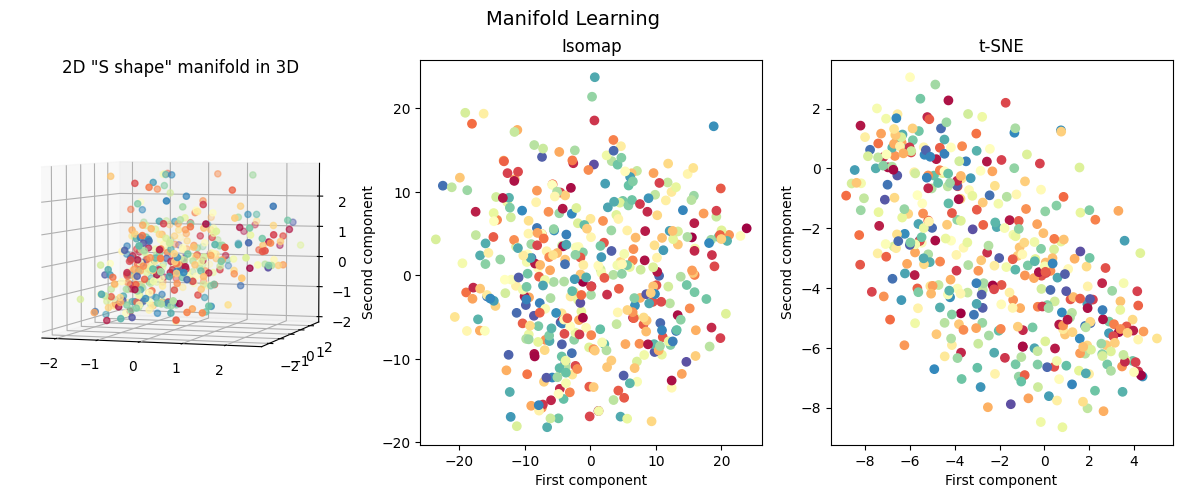

In [25]:
import matplotlib.pyplot as plt
isomap = manifold.Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X_train_selected)
color = np.random.rand(410)

fig = plt.figure(figsize=(15, 5))
plt.suptitle("Manifold Learning", fontsize=14)
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X_train_selected[:, 0], X_train_selected[:, 1], X_train_selected[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.title('2D "S shape" manifold in 3D')
ax = fig.add_subplot(132)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap")
plt.xlabel("First component")
plt.ylabel("Second component")
ax = fig.add_subplot(133)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.axis('tight')


## Feature selection with Lasso

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [15]:
scaler = StandardScaler()
scaler.fit(df_X_train)
#df_X_train.shape  #(410, 284)

StandardScaler()

In [16]:
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(df_y_train)

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

c:\Users\ababi\anaconda3\anacon\envs\brain-anatomy-schizophrenia\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(10e-3,10e3)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [75]:
search.fit(df_X_train,y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits
[CV 1/5] END ................model__alpha=0.01;, score=-0.186 total time=   0.0s
[CV 2/5] END ................model__alpha=0.01;, score=-0.149 total time=   0.0s
[CV 3/5] END ................model__alpha=0.01;, score=-0.194 total time=   0.0s
[CV 4/5] END ................model__alpha=0.01;, score=-0.185 total time=   0.0s
[CV 5/5] END ................model__alpha=0.01;, score=-0.189 total time=   0.0s
[CV 1/5] END ................model__alpha=1.01;, score=-0.253 total time=   0.0s
[CV 2/5] END ................model__alpha=1.01;, score=-0.245 total time=   0.0s
[CV 3/5] END ................model__alpha=1.01;, score=-0.250 total time=   0.0s
[CV 4/5] END ................model__alpha=1.01;, score=-0.251 total time=   0.0s
[CV 5/5] END ................model__alpha=1.01;, score=-0.246 total time=   0.0s
[CV 1/5] END ................model__alpha=2.01;, score=-0.253 total time=   0.0s
[CV 2/5] END ................model__alpha=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([1.00000e-02, 1.01000e+00, 2.01000e+00, ..., 9.99701e+03,
       9.99801e+03, 9.99901e+03])},
             scoring='neg_mean_squared_error', verbose=3)

In [76]:
#best value for alpha is 
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
search.best_params_

{'model__alpha': 0.01}

In [18]:
sel_ = SelectFromModel(Lasso(alpha=0.01)) #plus alpha grand plus des coef sont fixés à 0
sel_.fit(scaler.transform(df_X_train), y_train)

SelectFromModel(estimator=Lasso(alpha=0.01))

In [19]:
#the name of the removed features
removed_feats = df_X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['r3thVen_GM_Vol', 'l4thVen_GM_Vol', 'lAcc_GM_Vol', 'rAcc_GM_Vol',
       'lAmy_GM_Vol', 'rAmy_GM_Vol', 'lBst_GM_Vol', 'lCau_GM_Vol',
       'rCau_GM_Vol', 'lExtCbe_GM_Vol',
       ...
       'lSupOccGy_CSF_Vol', 'rSupOccGy_CSF_Vol', 'lSupParLo_CSF_Vol',
       'lSupTemGy_CSF_Vol', 'rSupTemGy_CSF_Vol', 'lTemPo_CSF_Vol',
       'rTemPo_CSF_Vol', 'lInfFroAngGy_CSF_Vol', 'lTemTraGy_CSF_Vol',
       'rTemTraGy_CSF_Vol'],
      dtype='object', length=215)

In [20]:
#remove the features from the training set 
X_train_selected = sel_.transform(scaler.transform(df_X_train))
X_train_selected.shape

(410, 69)

In [21]:
# liste of selected features

selected_feats = df_X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
#selected_feats
X_test_selected = sel_.transform(scaler.transform(df_x_test))
X_test_selected.shape
#len(selected_feats)

(103, 69)

### ----  Logistic regression

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model2 = LogisticRegression(solver='liblinear', random_state=0)
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(df_y_train)
y_test = label_encoder.fit_transform(y_test)

c:\Users\ababi\anaconda3\anacon\envs\brain-anatomy-schizophrenia\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
model2.fit(X_train_selected, y_train)
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

LogisticRegression(C=0.1, multi_class='warn', penalty='l1', random_state=0,
                   solver='liblinear', verbose=1)

In [45]:
model2 = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_selected, y_train)

In [46]:
model2.classes_
model2.intercept_
#model.coef_

array([-0.25199061])

In [47]:
X_test.shape


(103, 331979)

In [48]:
model2.predict_proba(X_test_selected)
model2.score(X_test_selected, y_test)

0.7184466019417476

### Ridge regression

In [18]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn import preprocessing
import dill as pickle

label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
#cv = problem.get_cv(X_train, y_train)

In [52]:

cv = problem.get_cv(X_train_selected, y_train)

estimator_ridge = make_pipeline(
    ROIsFeatureExtractor(),
    Ridge())

cv_results_ridge = cross_validate(estimator_ridge, X_train_selected, y_train, scoring=['roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('ROC-AUC=%.2f' % cv_results_ridge['test_roc_auc'].mean())


# Refit on all train
estimator_ridge.fit(X_train_selected, y_train)
# Apply on test
y_pred_train = estimator_ridge.predict(X_train_selected)
y_pred_test = estimator_ridge.predict(X_test_selected)
score_pred_test = estimator_ridge.predict(X_test_selected)

#bacc_test_ridge = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test_ridge = metrics.roc_auc_score(y_test, score_pred_test)

print("# Test")
print('ROC-AUC=%.2f' % auc_test_ridge)
#print('bACC=%.2f' % bacc_test_ridge,'ROC-AUC=%.2f' % auc_test_ridge)

# 5CV
ROC-AUC=0.87
# Test
ROC-AUC=0.80


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


## Elastic Net

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import GridSearchCV

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
#cv = problem.get_cv(X_train, y_train)

In [55]:
cv = problem.get_cv(X_train_selected, y_train)

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    estimator_EN = make_pipeline(
    ROIsFeatureExtractor(),
    ElasticNet(alpha=a)).fit(X_train_selected, y_train)

    pred_y = estimator_EN.predict(X_train_selected)
    score = estimator_EN.score(X_test_selected, y_test)
    mse = mean_squared_error(y_train, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))


Alpha:0.0001, R2:0.19, MSE:0.11, RMSE:0.33
Alpha:0.0010, R2:0.20, MSE:0.11, RMSE:0.34
Alpha:0.0100, R2:0.26, MSE:0.12, RMSE:0.34
Alpha:0.1000, R2:0.27, MSE:0.17, RMSE:0.41
Alpha:0.3000, R2:0.06, MSE:0.23, RMSE:0.48
Alpha:0.5000, R2:-0.00, MSE:0.25, RMSE:0.50
Alpha:0.7000, R2:-0.00, MSE:0.25, RMSE:0.50
Alpha:1.0000, R2:-0.00, MSE:0.25, RMSE:0.50


In [57]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

cv = problem.get_cv(X_train_selected, y_train)

#alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
estimator_EN = make_pipeline(
    ROIsFeatureExtractor(),
    ElasticNet(alpha=0.0001))

elastic_cv= cross_validate(estimator_EN, X_train_selected, y_train, scoring=['roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)
                         
#elastic_cv=ElasticNetCV(alphas=alphas, cv=cv)
#model = estimator_EN.fit(X_train, y_train)
estimator_EN.fit(X_train_selected, y_train)
#print(model.alpha_)
#print(model.intercept_)

ypred = estimator_EN.predict(X_test_selected)
score = estimator_EN.score(X_test_selected, y_test)
mse = mean_squared_error(y_test, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.186, MSE:0.20, RMSE:0.45


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


In [58]:
print("# 5CV")
print('ROC-AUC=%.2f' % elastic_cv['test_roc_auc'].mean())

# 5CV
ROC-AUC=0.87


In [60]:
score_pred_test = estimator_EN.predict(X_test_selected)
auc_test_EN = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('ROC-AUC=%.2f' % auc_test_EN)

# Test
ROC-AUC=0.79


In [65]:
#estimator_EN[-1].coef_.shape

# Fonction qui retourne la probabilité que les resultats obtenus sur le test set sont du au hazard

In [45]:
from sklearn import metrics
from sklearn.base import ClassifierMixin

# Fonction qui retourne la probabilité que les resultats obtenus sur le test set sont du au hazard

def compute_scores_p_value(estimator: ClassifierMixin, X_train: np.ndarray, X_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray, nb_permutations: int = int(10e3)):
    """
    Compute the probabilities that the ROC AUC score and the Balanced accuracy that we obtain are due to randomness.
    It is done by training the estimator on the train samples and then evaluating the estimator on a shuffled version of the target test vector.

    Args:
        estimator (ClassifierMixin): The estimator to test.
        X_train (np.ndarray): The training dataset.
        X_test (np.ndarray): The test dataset.
        y_train (np.ndarray): The training target vector.
        y_test (np.ndarray): The test target vector that will be permuted.
        nb_permutations (int, optional): The number of permutations of the target vector to do. Defaults to int(10e3).

    Returns:
        (float): The probability that the AUC we obtain on the test set is due to randomness.
        (float): The probability that the Balanced Accuracy that we obtain is due to randomness.
        (float): The AUC obtained before permuting the test target vector.
        (float): The Balanced Accuracy obtained before permuting the test target vector.
        (np.ndarray): The vector of AUC obtained on permuted test target vector.
        (np.ndarray): The vector of Balanced Accuracy obtained on permuted test target vector.
    """
    nb_permutations = int(10e3)

    estimator.fit(X_train, y_train)
    try:
        exist_predict_proba = True
        auc = metrics.roc_auc_score(y_test, estimator.predict_proba(X_test)[:, 1].ravel())
    except AttributeError:
        exist_predict_proba = False
        auc = metrics.roc_auc_score(y_test, estimator.decision_function(X_test).ravel())
        
    bacc = metrics.balanced_accuracy_score(y_test, estimator.predict(X_test))

    print(f"Performance before 1000 permutations :\nROC AUC : {auc:.2f}\nBalanced Accuracy : {bacc:.2f}")
    auc_list = list()
    bac_list = list()

    for iter_permutation in range(nb_permutations):
        if exist_predict_proba:
            auc_list.append(metrics.roc_auc_score(np.random.permutation(y_test), estimator.predict_proba(X_test)[:, 1].ravel()))
        else:
            auc_list.append(metrics.roc_auc_score(np.random.permutation(y_test), estimator.decision_function(X_test).ravel()))
        bac_list.append(metrics.balanced_accuracy_score(np.random.permutation(y_test), estimator.predict(X_test)))

    auc_list = np.array(auc_list)
    bac_list = np.array(bac_list)

    # One-tailed empirical p-value
    pval_auc = np.sum(auc_list >= auc) / auc_list.shape[0]
    pval_bac = np.sum(bac_list >= bacc) / bac_list.shape[0]
    
    print(f"Probability that the AUC we computed is due to randomness {pval_auc*100:.2f}%\nProbability that the Balanced Accuracy we computed is due to randomness {pval_bac*100:.2f}%")
    return pval_auc, pval_bac, auc, bacc, auc_list, bac_list

## Random Forest

In [46]:
cv = problem.get_cv(X_train_selected, y_train)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    RandomForestClassifier(random_state=1))
    
cv_results = cross_validate(estimator, X_train_selected, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train_selected, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train_selected)
y_pred_test = estimator.predict(X_test_selected)
score_pred_test = estimator.predict_proba(X_test_selected)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)


p_auc, p_bac, _, _, perf_auc, perf_bac = compute_scores_p_value(estimator, X_train_selected, X_test_selected, y_train, y_test)
print(f"Probabilité que l'AUC soit dû au hasard : {p_auc} / Probabilité que l'AUC soit dû au hasard : {p_bac}")

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    4.7s finished


# 5CV
bACC=0.73 ROC-AUC=0.82
# Test
bACC=0.75 ROC-AUC=0.81
Performance before 1000 permutations :
ROC AUC : 0.81
Balanced Accuracy : 0.75
Probability that the AUC we computed is due to randomness 0.00%
Probability that the Balanced Accuracy we computed is due to randomness 0.00%
Probabilité que l'AUC soit dû au hasard : 0.0 / Probabilité que l'AUC soit dû au hasard : 0.0


In [61]:
probas_auc = [np.sum((perf_auc > seuil))/perf_auc.shape[0] for seuil in np.arange(min(perf_auc), 0.91, step = .05)]
probas_bacc = [np.sum((perf_bac > seuil))/perf_bac.shape[0] for seuil in np.arange(min(perf_bac), 0.91, step = .05)]

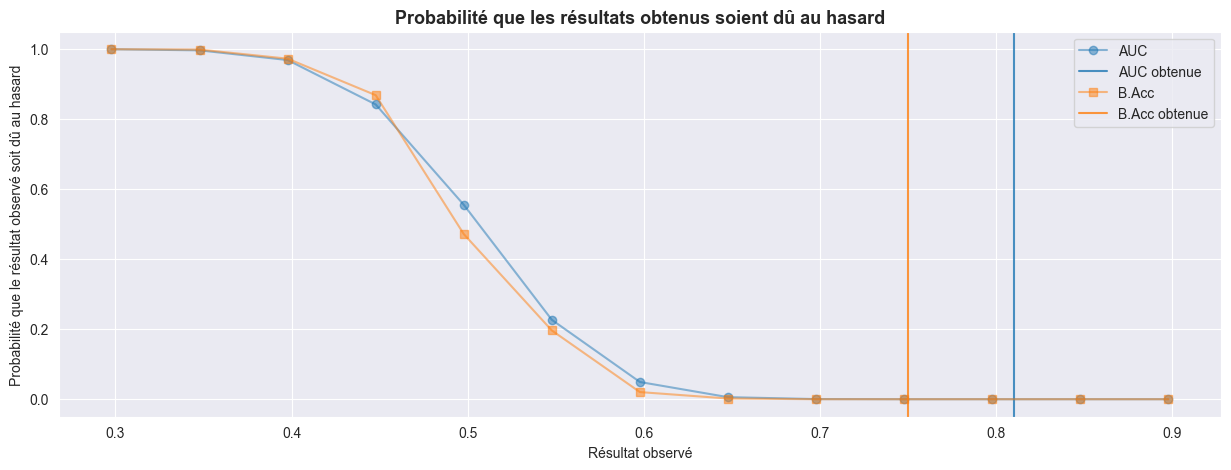

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = "darkgrid")

# Créer une figure de 15 pouces de large et 10 pouces de haut
plt.figure(figsize =(15, 5))
plt.title("Probabilité que les résultats obtenus soient dû au hasard", fontsize = 13, fontweight = "bold")
# Vous pouvez maintenant tracer sur les deux sous-tracés en utilisant axs[0] et axs[1]
plt.plot(np.arange(min(perf_bac), 0.91, step = .05), probas_auc, marker = "o", color = "C0", alpha = .5, label = "AUC")
plt.axvline(0.81, color = "C0", label = "AUC obtenue", alpha = .8)
plt.ylabel("Probabilité que le résultat observé soit dû au hasard")
plt.xlabel("Résultat observé")
plt.plot(np.arange(min(perf_bac), 0.91, step = .05), probas_bacc, marker = "s", color = "C1", alpha = .5, label = "B.Acc")
plt.axvline(0.75, color = "C1", label = "B.Acc obtenue", alpha = .8)
plt.legend(loc = "upper right")
# Afficher le graphique
plt.savefig("proba.png")

NameError: name 'perf_bacc' is not defined

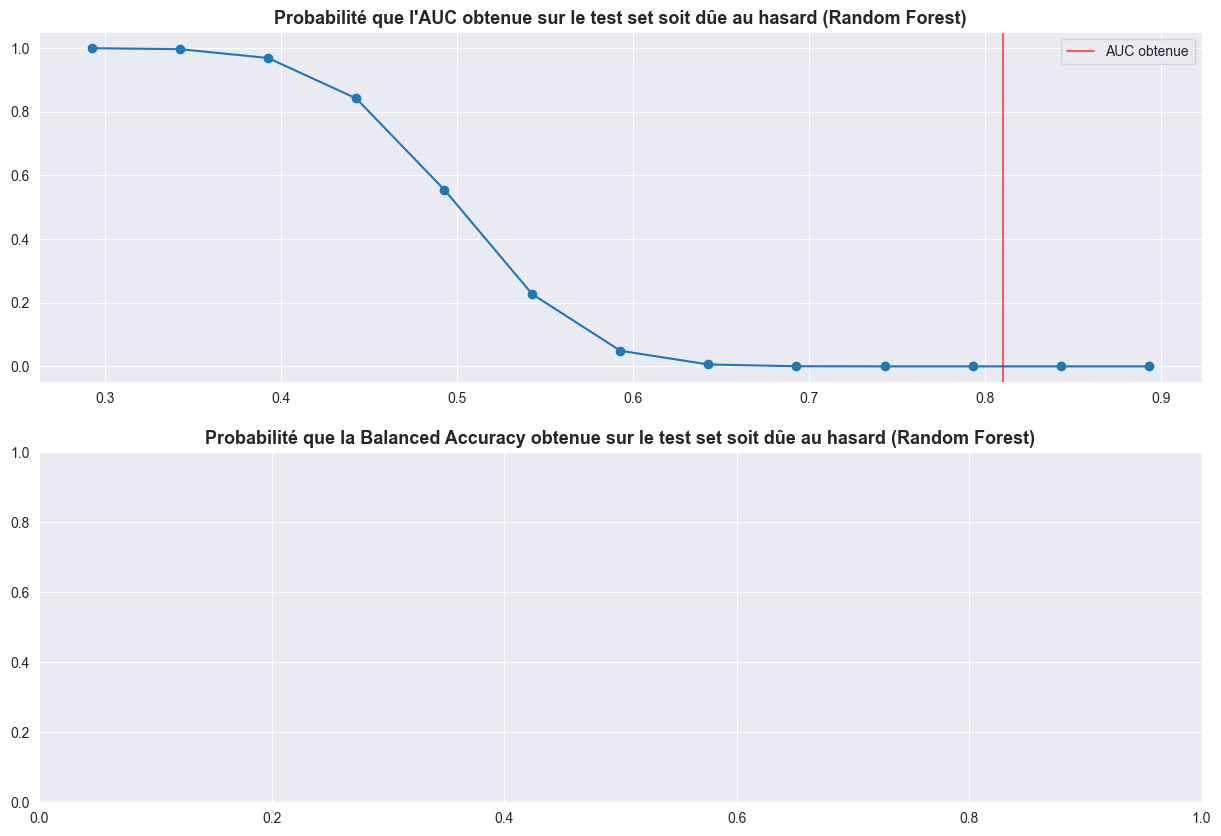

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = "darkgrid")

# Créer une figure de 15 pouces de large et 10 pouces de haut
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Vous pouvez maintenant tracer sur les deux sous-tracés en utilisant axs[0] et axs[1]
axs[0].set_title("Probabilité que l'AUC obtenue sur le test set soit dûe au hasard (Random Forest)", fontsize = 13, fontweight = "bold")
axs[0].plot(np.arange(min(perf_auc), 0.91, step = .05), probas_auc, marker = "o", color = "C0")
axs[0].axvline(0.81, color = "red", label = "AUC obtenue", alpha = .6)
axs[0].legend()

axs[1].set_title("Probabilité que la Balanced Accuracy obtenue sur le test set soit dûe au hasard (Random Forest)", fontsize = 13, fontweight = "bold")
axs[1].plot(np.arange(min(perf_bacc), 0.81, step = .05), probas_bacc, marker = "s", color = "C1")
axs[1].axvline(0.75, color = "red", label = "B.Acc obtenue", alpha = .6)
axs[1].legend(loc = "upper right")

# Afficher le graphique
plt.show()


## Gradient Boosting Classifier

In [24]:
#essay
from sklearn.ensemble import GradientBoostingClassifier

cv = problem.get_cv(X_train_selected, y_train)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    GradientBoostingClassifier(random_state=1))
    
cv_results = cross_validate(estimator, X_train_selected, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train_selected, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train_selected)
y_pred_test = estimator.predict(X_test_selected)
score_pred_test = estimator.predict_proba(X_test_selected)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    1.0s finished


# 5CV
bACC=0.74 ROC-AUC=0.83
# Test
bACC=0.76 ROC-AUC=0.85


## Linear classifiers (SVM, logistic regression, etc.) with SGD training = SGDClassifier

In [28]:
from sklearn.linear_model import SGDClassifier

cv = problem.get_cv(X_train_selected, y_train)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    SGDClassifier(random_state=1, loss = 'log_loss', max_iter=1000))
    
cv_results = cross_validate(estimator, X_train_selected, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train_selected, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train_selected)
y_pred_test = estimator.predict(X_test_selected)
score_pred_test = estimator.predict_proba(X_test_selected)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

p_auc, p_bac, _, _, _, _ = compute_scores_p_value(estimator, X_train_selected, X_test_selected, y_train, y_test)
print(f"Probabilité que l'AUC soit dû au hasard : {p_auc} / Probabilité que l'AUC soit dû au hasard : {p_bac}")

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


# 5CV
bACC=0.79 ROC-AUC=0.86
# Test
bACC=0.73 ROC-AUC=0.75
Performance before permutations :
ROC AUC : 0.75
Balanced Accuracy : 0.73
Probability that the AUC we computed is due to randomness 0.00%
Probability that the Balanced Accuracy we computed is due to randomness 0.00%
Probabilité que l'AUC soit dû au hasard : 0.0 / Probabilité que l'AUC soit dû au hasard : 0.0


## SVM

In [77]:
from sklearn import svm
cv = problem.get_cv(X_train_selected, y_train)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    svm.SVC(kernel="rbf", probability=True))
    
cv_results = cross_validate(estimator, X_train_selected, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train_selected, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train_selected)
y_pred_test = estimator.predict(X_test_selected)
score_pred_test = estimator.predict_proba(X_test_selected)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    7.0s remaining:   10.5s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    7.0s finished


# 5CV
bACC=0.76 ROC-AUC=0.86
# Test
bACC=0.73 ROC-AUC=0.83


In [78]:
#estimator.predict_proba(X_test_selected)

## VBM data 

In [4]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
from matplotlib import image
from tensorflow import keras
from keras import layers
from keras import Sequential
from keras import models
from os import listdir
from os.path import isfile, join
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, GlobalAveragePooling2D

import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Preprocesing
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Models

import sklearn.svm as svm
from sklearn.neural_network import MLPClassifier

# Pytorch Models
import torch
#import torchvision   ???
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
import skorch
# Use [skorch](https://github.com/skorch-dev/skorch). Install:
# `conda install -c conda-forge skorch`
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
# Open the npz file
with np.load(r'data/train_vbm.npz', allow_pickle=True) as data:
    # Iterate over the keys
    for key in data.keys():
        # Access the array using the key
        array = data[key]
        #print(array)

In [21]:
#torch.__version__

# prof version  MLPClassifier

cv = problem.get_cv(X_train, y_train)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    MLPClassifier(random_state=1, hidden_layer_sizes=(200, 150, 100, 50, 25, )))
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.7min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.3min finished


# 5CV
bACC=0.71 ROC-AUC=0.77
# Test
bACC=0.63 ROC-AUC=0.74


## _Logistic regression with L2 penalty (with CV-based model selection)_

In [70]:
cv = problem.get_cv(X_train, y_train)

lrl2_cv = make_pipeline(preprocessing.StandardScaler(),
# preprocessing.MinMaxScaler(), # Would have done the job either
                GridSearchCV(lm.LogisticRegression(max_iter=1000, class_weight='balanced',fit_intercept=False),
                {'C': 10. ** np.arange(-3, 3)},
                cv=5, n_jobs=5))
t0 = time()
lrl2_cv.fit(X=X_train, y=y_train)
print("done in %0.3fs" % (time() - t0))
print("Best params found by grid search:")
print(lrl2_cv.steps[-1][1].best_params_)

#done in 1797.429s
#Best params found by grid search:
#{'C': 100.0}

done in 1500.126s
Best params found by grid search:
{'C': 100.0}


In [71]:
y_pred = lrl2_cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

               precision    recall  f1-score   support

      control       0.73      0.80      0.77        55
schizophrenia       0.74      0.67      0.70        48

     accuracy                           0.74       103
    macro avg       0.74      0.73      0.73       103
 weighted avg       0.74      0.74      0.74       103

[[44 11]
 [16 32]]


In [79]:
y_pred_train = lrl2_cv.predict(X_train)
y_pred_test = lrl2_cv.predict(X_test)
score_pred_test = lrl2_cv.predict_proba(X_test)[:, 1]
bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

# Test
bACC=0.73 ROC-AUC=0.82


## Design of predictors and their evaluation using CV and test set

The framework is evaluated with a cross-validation approach. The metrics used are the ROC-AUC (auc) and the balanced Accuracy (bacc).

First we propose a simple classification predictor based on ROIs features only:

In [ ]:
cv = problem.get_cv(X_train, y_train)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    MLPClassifier(random_state=1, hidden_layer_sizes=(200, 150, 100, 50, 25, )))
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.1min finished


# 5CV
bACC=0.71 ROC-AUC=0.77
# Test
bACC=0.63 ROC-AUC=0.74


Then we test a simple classification predictor based on large VBM features, using `RandomForestClassifier` that will be faster on high dimensionnal VBM data.

In [ ]:
cv = problem.get_cv(X_train, y_train)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    RandomForestClassifier(random_state=1))
    
cv_results = (estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.8min remaining:  4.2min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.8min finished


# 5CV
bACC=0.70 ROC-AUC=0.76
# Test
bACC=0.63 ROC-AUC=0.70


## Test submission locally

The submissions need to be located in the submissions folder. For instance for `starting_kit`, it should be located in `submissions/submissions/starting_kit`.

Copy everything required (the cell bellow) to build your estimator in a submission file: `submissions/submissions/starting_kit/estimator.py`. This file must contain a function `get_estimator()`:

In [ ]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]


def get_estimator():
    """Build your estimator here."""
    estimator = make_pipeline(
        ROIsFeatureExtractor(),
        MLPClassifier(random_state=1, hidden_layer_sizes=(200, 150, 100, 50, 25, )))

    return estimator

Run locally:
    
```
ramp-test --submission starting_kit
```

## Submission on RAMP:


Follow the instructions: [Submitting to a ramp event](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html#submitting-to-a-ramp-event)

The event is [Predict schizophrenia from brain grey matter (classification)](https://ramp.studio/problems/brain_anatomy_schizophrenia)

In [ ]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]


def get_estimator():
    """Build your estimator here."""
    estimator = make_pipeline(
        ROIsFeatureExtractor(),
        MLPClassifier(random_state=1, hidden_layer_sizes=(200, 150, 100, 50, 25, )))

    return estimator

In [ ]:
#ramp-test --submission starting_kit

import numpy as np

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]


def get_estimator():
    """Build your estimator here."""
    estimator = make_pipeline(
        ROIsFeatureExtractor(),
        StandardScaler(),
        SelectFromModel(Lasso(alpha = 0.001),
                        threshold = 10e-8,
                        prefit = False),
        RandomForestClassifier())

    return estimator